# EDA (Exploratory Data Analysis)

here, we will clean, manipulate, and get an idea of what our dataset looks like; what are the features? 

In other words, what exactly are we working with?

A more thorough breakdown 

Data Loading and Preprocessing:
- Load the dataset.
- Handle missing values (if any).
- Convert possession time from HH:MM to total minutes.

Initial Feature Analysis:
- Use info() and describe() to understand data types and distributions.
- Identify important columns and relationships.

Exploratory Visualizations:
- Distributions (e.g., scores, possession time).
- Scatter plots (e.g., possession time vs. scores).
- Correlation heatmap.

Feature Comparisons by Win/Loss:
- Compare features like possession time, interceptions, yards per play, and red zone efficiency.

Outlier Analysis and Treatment:
- Flag and optionally exclude outliers for metrics like scores and turnovers.
- Save a filtered dataset if necessary.

Class Balance Check:
- Check and visualize the balance of win_loss_home

let's start with some data preprocessing

In [41]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('../data/nfl_team_stats_2002-2023.csv')

# Overview of the data
print(data.head())
print(data.info())
print(data.describe())

   season week        date  time_et  neutral       away        home  \
0    2002    1  2002-09-05  8:30 PM    False      49ers      Giants   
1    2002    1  2002-09-08  1:00 PM    False      Colts     Jaguars   
2    2002    1  2002-09-08  1:00 PM    False  Cardinals  Commanders   
3    2002    1  2002-09-08  1:00 PM    False      Lions    Dolphins   
4    2002    1  2002-09-08  1:00 PM    False     Eagles      Titans   

   score_away  score_home  first_downs_away  ...  redzone_comp_home  \
0          16          13                13  ...                  0   
1          28          25                18  ...                  0   
2          23          31                14  ...                  0   
3          21          49                15  ...                  0   
4          24          27                17  ...                  0   

   redzone_att_home  fumbles_away  fumbles_home  interceptions_away  \
0                 6             0             0                   1   
1   

Based on that, here's a breakdown:

Number of Entries: 5,929 rows, which likely correspond to individual games.
Number of Features: 61 columns, including season, team names, scores, and various game statistics.

Data Types:
- Numerical (int64): Most columns are integers (e.g., scores, yardage, turnovers).
- Categorical (object): Columns like week, date, away, and home.
- Boolean: The neutral column indicates whether the game was played on neutral ground.

Notable Columns
Identifiers:
- season: The year of the game.
- week: Week of the NFL season.
- date and time_et: Game date and time.
- away and home: Names of the teams.


Performance Metrics:
Team Scores:
- score_away and score_home: Final scores for away and home teams.

Yardage:
- yards_away and yards_home: Total yardage gained by each team.
     - Includes breakdowns like pass_yards, rush_yards, and sacks_yards.

Turnovers:
- fumbles_away, fumbles_home, interceptions_away, interceptions_home.

Possession Time:
- possession_away and possession_home (formatted as HH).

Red Zone Efficiency:
- redzone_comp_away and redzone_att_away (and home counterparts).

Game Events:
- def_st_td_away and def_st_td_home: Defensive/special teams touchdowns.

Furthermore, here's some possible conclusions from the data loading:

No Missing Data:
- The dataset shows zero null values across all columns (all show 5929 value, so no missing), which simplifies preprocessing.

Data Distribution:
- Scores: Averages are around 21 for away teams and around 23 for home teams, suggesting that home teams may have an advantage.
- Turnovers: Median values are low, but outliers (e.g., max interceptions = 6) could influence outcomes.
- Possession Time: Needs conversion from HH to numerical format for analysis.

Outliers:
- Max scores (70 points) and turnovers (6 interceptions) may indicate unusual games that should be flagged for further investigation.

In [42]:
def time_to_minutes(possession):
    # split the string on ':' to separate hours and minutes
    parts = possession.split(':')
    
    
    total_minutes = int(parts[0]) * 60 + int(parts[1]) # convert hours to minutes and add minutes
    return total_minutes

#apply the function to both possession columns
data['possession_away'] = data['possession_away'].apply(time_to_minutes)
data['possession_home'] = data['possession_home'].apply(time_to_minutes)

#check the result
print(data[['possession_away', 'possession_home']].head())

   possession_away  possession_home
0             1652             1948
1             1647             1953
2             1536             2064
3             1536             2064
4             1752             1848


### Why Convert Possession Time?

The possession_away and possession_home columns are initially formatted as strings in HH:MM (hours and minutes). While this format is readable for us, it can't be used directly in our model.

To make this data usable:
1. We converted the time into total minutes, which provides a numerical representation.
2. This allows us to:
   - Compare possession time between teams effectively.
   - Use possession time as a feature in machine learning models.
   - Analyze its relationship with other numerical metrics, such as scores or turnovers.

Now, let's do a little more investigating, this time visually

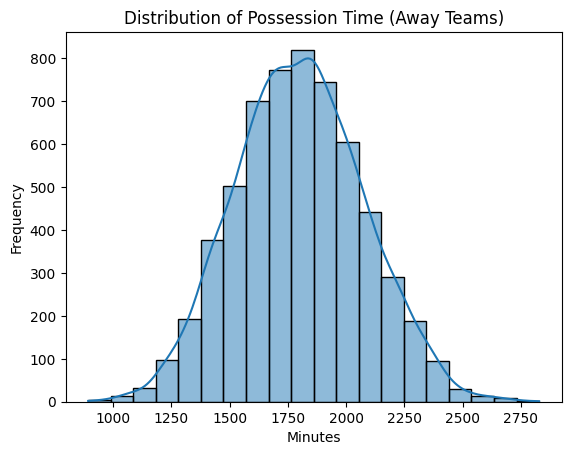

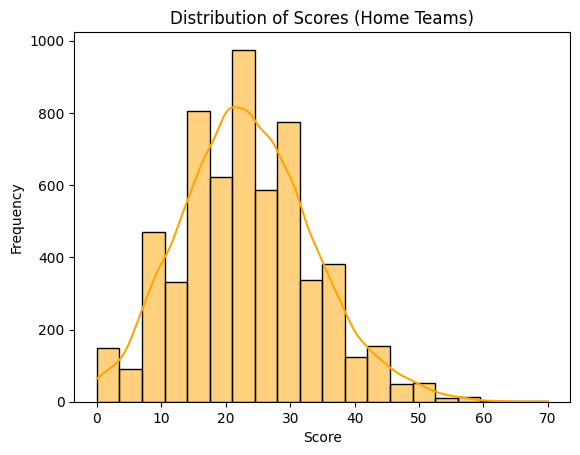

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of possession times
sns.histplot(data['possession_away'], kde=True, bins=20)
plt.title('Distribution of Possession Time (Away Teams)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

# Distribution of scores
sns.histplot(data['score_home'], kde=True, bins=20, color='orange')
plt.title('Distribution of Scores (Home Teams)')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

### Observations: Distribution of Possession Time and Scores

1. Possession Time:
   - The possession time for away teams shows a fairly normal distribution centered around 27-32 minutes, with some variation.
   - This aligns with the general expectation that teams share possession time relatively equally in most games.

2. Scores:
   - Home team scores exhibit a slightly skewed distribution with most scores concentrated between 17-30 points.
   - This suggests a scoring advantage for home teams, which is consistent with the commonly observed "home-field advantage."

let's also look at correlation between features

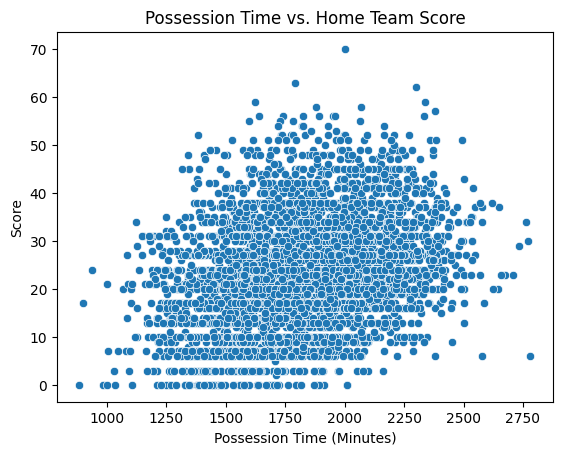

In [44]:
# Scatter plot: possession time vs. scores
sns.scatterplot(x='possession_home', y='score_home', data=data)
plt.title('Possession Time vs. Home Team Score')
plt.xlabel('Possession Time (Minutes)')
plt.ylabel('Score')
plt.show()

### Observations: Possession Time vs. Home Team Score

- The scatter plot reveals a weak positive correlation between possession time and home team scores.
- While teams with higher possession times tend to score slightly more, possession time alone does not fully explain score variability.
- This suggests other factors (e.g., turnovers, red zone efficiency) may have a stronger influence on scoring.


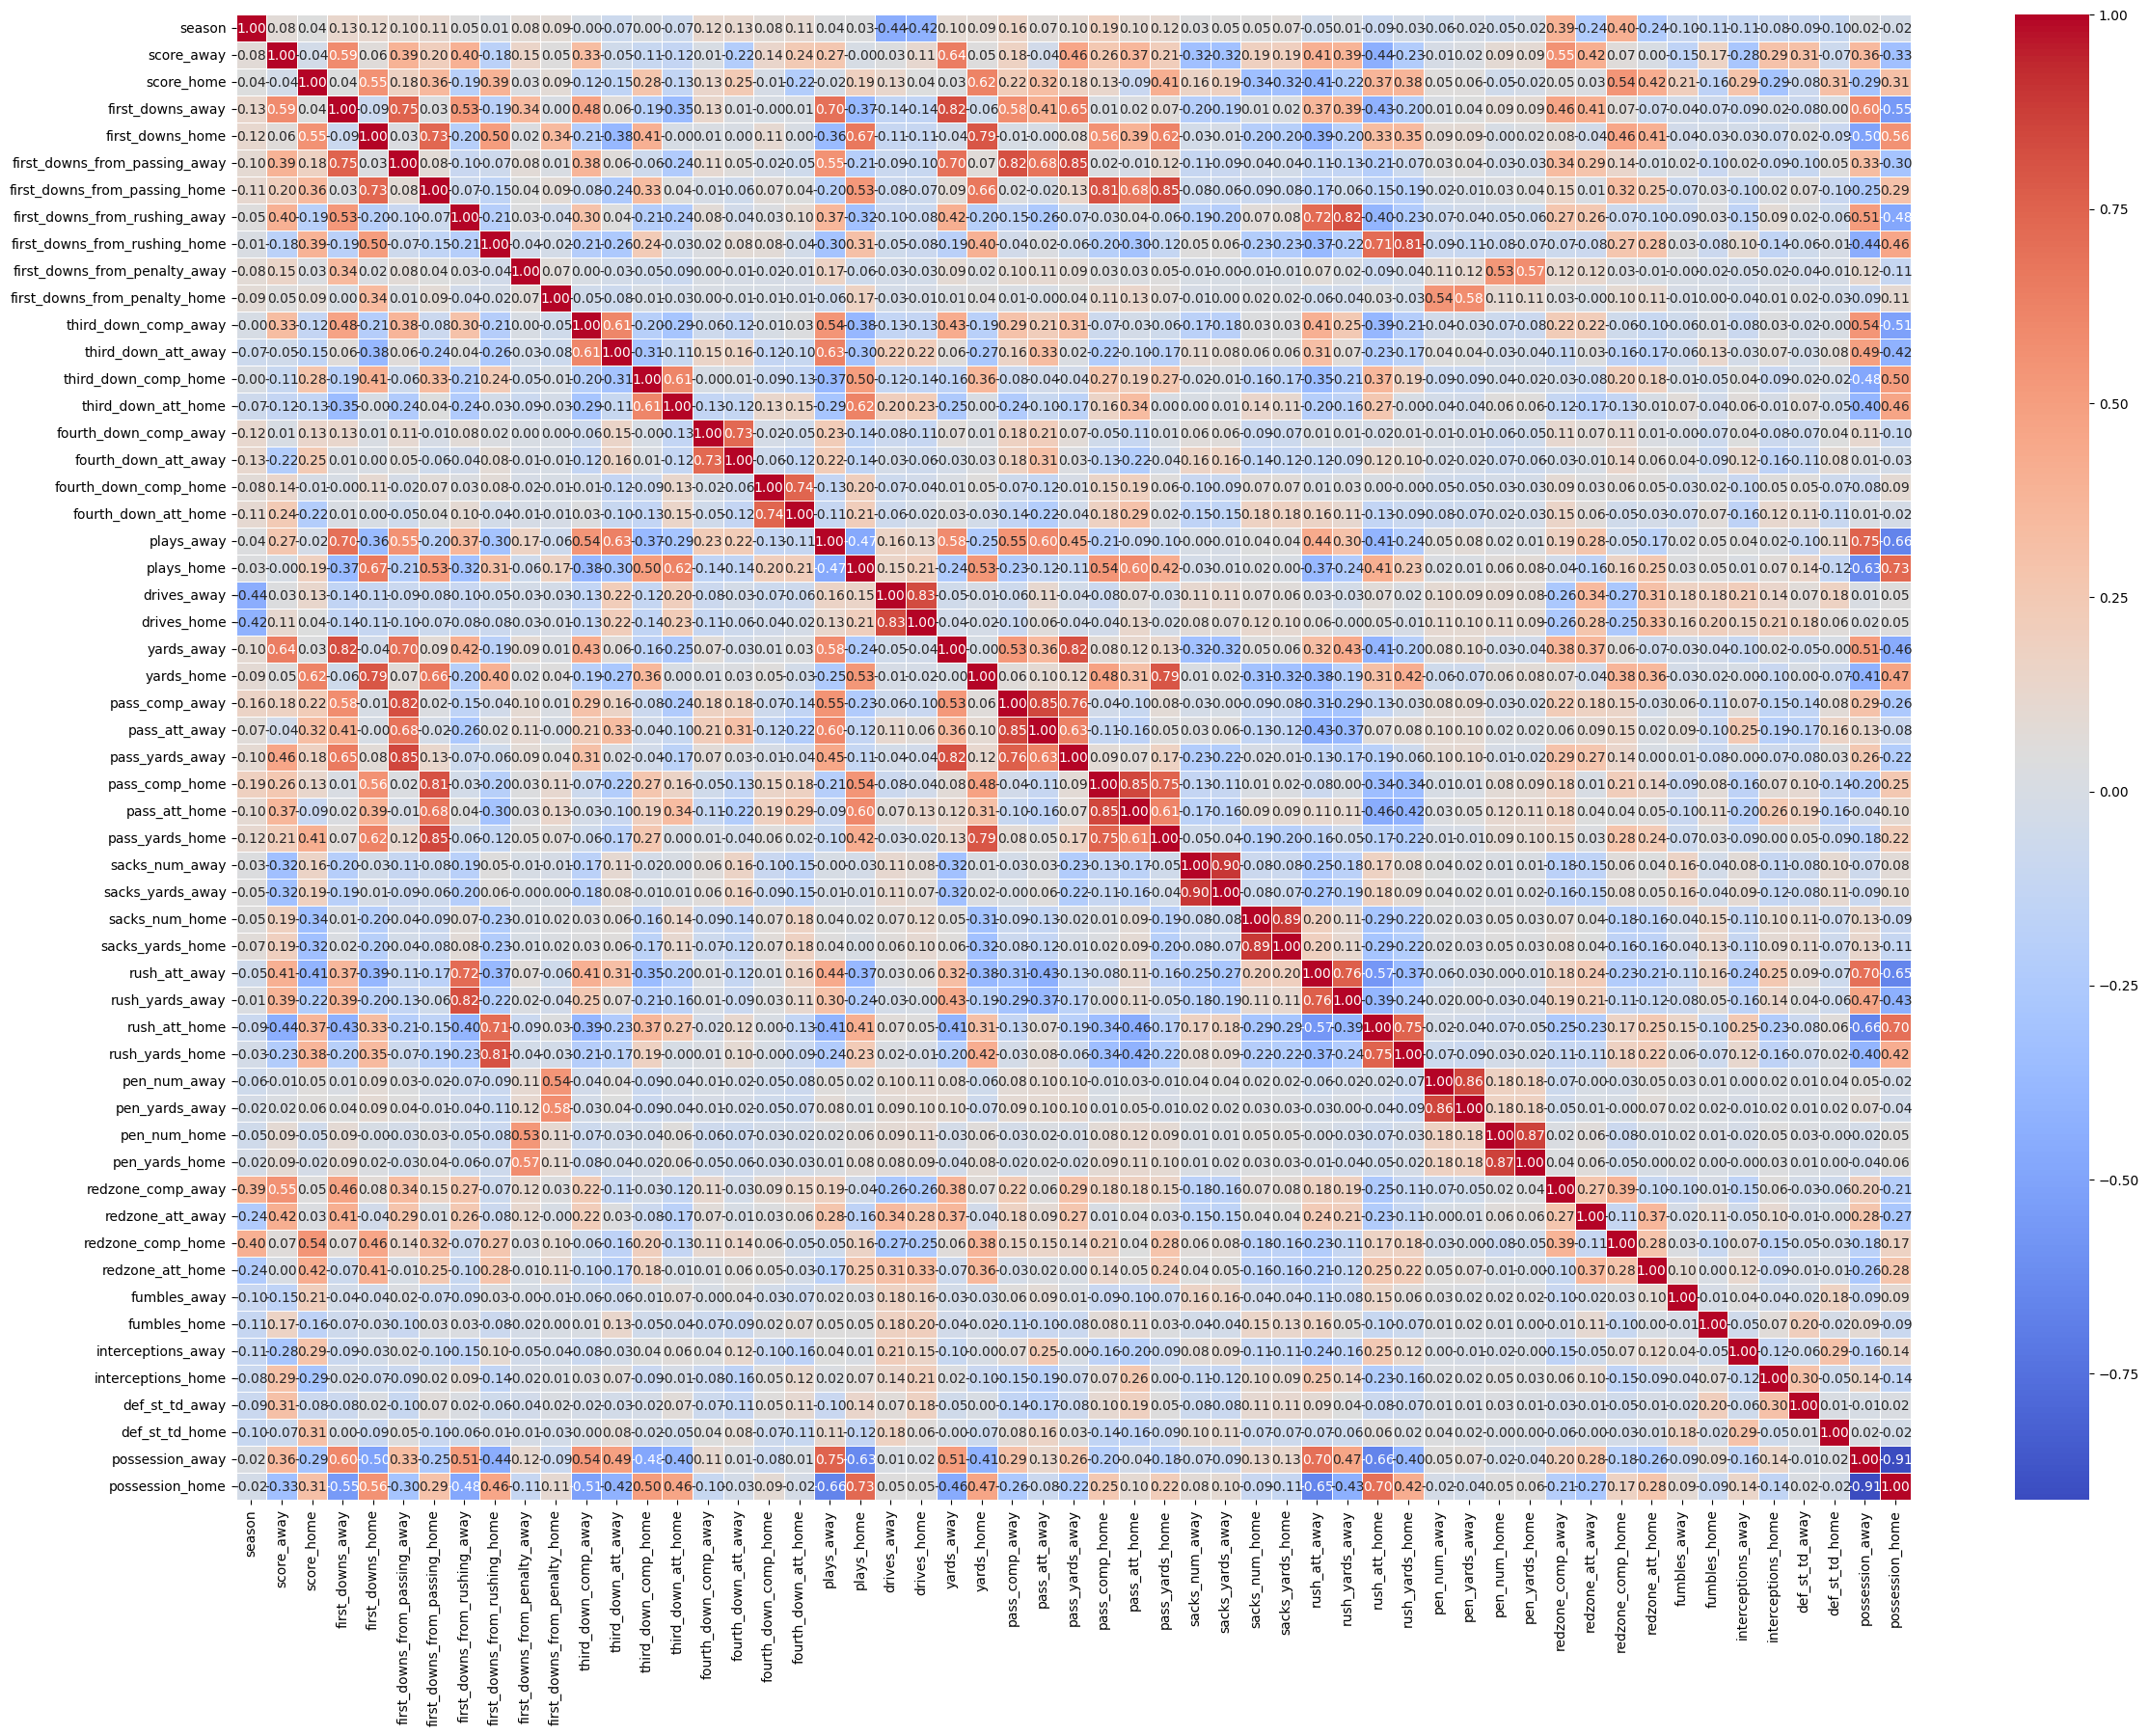

In [45]:
#select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

#correlation heatmap
'''
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()
'''

#looked up some of these because the decimals weren't fitting/visible
plt.figure(figsize=(28, 20))  # Larger figure for better readability
heatmap = sns.heatmap(
    numeric_data.corr(), 
    annot=True, 
    fmt=".2f",  # Limit to 2 decimal places
    annot_kws={"size": 10},  # Annotation font size
    cmap='coolwarm', 
    linewidths=0.5  # Add lines between cells for better separation
)

### Observations: Correlation Heatmap

- Strong Correlations:
  - Home team possession time is moderately correlated with score_home (around 0.3), indicating that longer possession generally leads to higher scores.
  - Other metrics like yards_home and pass_yards_home show strong correlations with score_home (around 0.6-0.7), highlighting the importance of offensive yardage in determining scores.

- Negative Correlations:
  - Defensive metrics like interceptions_home and sacks_yards_away show weak to moderate negative correlations with scores, as turnovers typically hinder scoring opportunities.

- Weak/No Correlations:
  - Some metrics, such as penalties, show little to no correlation with scores, indicating they may not significantly impact overall game outcomes.


moving on, let's compare performance stats for winning and losing teams

In [46]:
# Create a binary win/loss column for home teams
data['win_loss_home'] = (data['score_home'] > data['score_away']).astype(int)

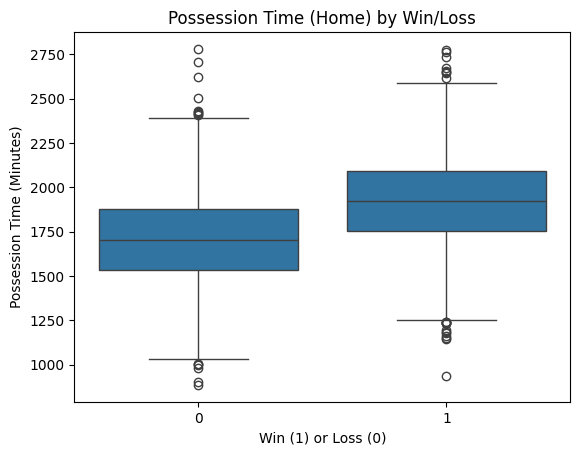

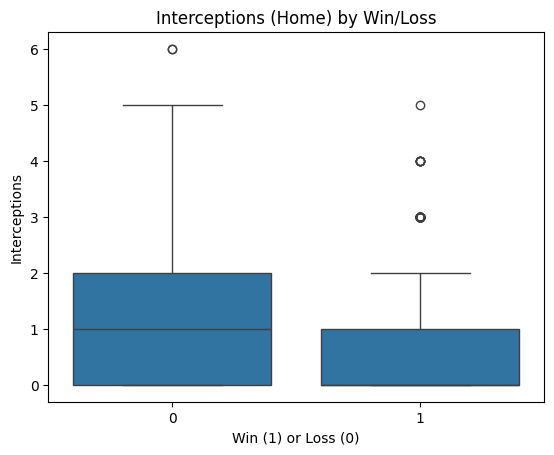

In [47]:
# Boxplot: possession time by win/loss
sns.boxplot(x='win_loss_home', y='possession_home', data=data)
plt.title('Possession Time (Home) by Win/Loss')
plt.xlabel('Win (1) or Loss (0)')
plt.ylabel('Possession Time (Minutes)')
plt.show()

# Boxplot: turnovers by win/loss
sns.boxplot(x='win_loss_home', y='interceptions_home', data=data)
plt.title('Interceptions (Home) by Win/Loss')
plt.xlabel('Win (1) or Loss (0)')
plt.ylabel('Interceptions')
plt.show()

### Observations: Performance by Win/Loss (Home Teams)

1. Possession Time:
   - Winning teams generally have longer possession times than losing teams.
   - This supports the idea that controlling possession contributes to a higher likelihood of winning.

2. Interceptions:
   - Losing teams tend to throw more interceptions compared to winning teams.
   - This aligns with the expectation that turnovers negatively impact game outcomes and reduce a team’s chances of winning.


let's next flag outliers, aka high scoring games and high interceptions

In [48]:
# High-scoring games
high_scores = data[(data['score_home'] > 50) | (data['score_away'] > 50)]
print("Games with unusually high scores:")
print(high_scores[['season', 'week', 'away', 'home', 'score_away', 'score_home']])

Games with unusually high scores:
      season week      away      home  score_away  score_home
57      2002    4    Titans   Raiders          25          52
192     2002   14   Bengals  Panthers          31          52
325     2003    4     Colts    Saints          55          21
624     2004    7   Falcons    Chiefs          10          56
696     2004   12    Browns   Bengals          48          58
...      ...  ...       ...       ...         ...         ...
5553    2022   13     Colts   Cowboys          19          54
5597    2022   16   Broncos      Rams          14          51
5682    2023    3   Broncos  Dolphins          20          70
5852    2023   15  Chargers   Raiders          21          63
5890    2023   17  Dolphins    Ravens          19          56

[68 rows x 6 columns]


### Observations: High-Scoring Games

- Several games with unusually high scores (>50 points) were identified, which are likely anomalies or indicative of high-powered offensive matchups.
     - can be either one way like Broncos vs Dolphins or both ways in terms of offensive strength
- These games may disproportionately influence metrics like scoring averages and correlations, so they could be flagged for further analysis or excluded depending on modeling needs.


In [49]:
# Identify games with unusually high turnovers
high_turnovers = data[(data['interceptions_home'] > 3) | (data['interceptions_away'] > 3)]
print("Games with unusually high turnovers:")
print(high_turnovers[['season', 'week', 'away', 'home', 'interceptions_home', 'interceptions_away']])

Games with unusually high turnovers:
      season week      away        home  interceptions_home  \
38      2002    3  Panthers     Vikings                   4   
42      2002    3   Packers       Lions                   4   
45      2002    3      Rams  Buccaneers                   0   
49      2002    4  Dolphins      Chiefs                   0   
57      2002    4    Titans     Raiders                   0   
...      ...  ...       ...         ...                 ...   
5677    2023    3     Bills  Commanders                   4   
5823    2023   12     Bears     Vikings                   4   
5876    2023   16     Lions     Vikings                   4   
5883    2023   16    Ravens       49ers                   5   
5893    2023   17   Falcons       Bears                   0   

      interceptions_away  
38                     2  
42                     1  
45                     4  
49                     4  
57                     4  
...                  ...  
5677             

Similar to high scoring games, high interceptions games may disproportionately influence metrics, so they could be flagged for further analysis or excluded depending on modeling needs 

let's also add more features that may be useful for the analysis, and see it's impact on the heatmap

In [50]:
# Red Zone Efficiency
data['redzone_efficiency_home'] = data['redzone_comp_home'] / data['redzone_att_home']
data['redzone_efficiency_away'] = data['redzone_comp_away'] / data['redzone_att_away']

# Yards per Play
data['yards_per_play_home'] = data['yards_home'] / data['plays_home']
data['yards_per_play_away'] = data['yards_away'] / data['plays_away']

# Check the new features
print(data[['redzone_efficiency_home', 'yards_per_play_home']].tail())

      redzone_efficiency_home  yards_per_play_home
5924                 0.750000             5.507042
5925                 0.750000             4.717949
5926                 0.000000             5.894737
5927                 0.800000             6.257576
5928                 0.333333             5.759494


now, let's do a box plot for them

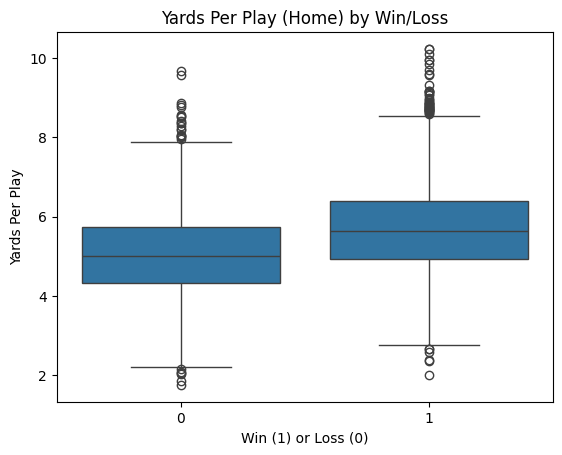

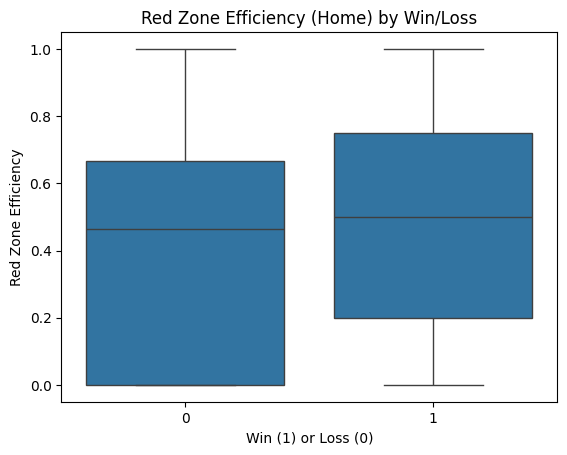

In [51]:
# Boxplot: yards per play by win/loss
sns.boxplot(x='win_loss_home', y='yards_per_play_home', data=data)
plt.title('Yards Per Play (Home) by Win/Loss')
plt.xlabel('Win (1) or Loss (0)')
plt.ylabel('Yards Per Play')
plt.show()

# Boxplot: red zone efficiency by win/loss
sns.boxplot(x='win_loss_home', y='redzone_efficiency_home', data=data)
plt.title('Red Zone Efficiency (Home) by Win/Loss')
plt.xlabel('Win (1) or Loss (0)')
plt.ylabel('Red Zone Efficiency')
plt.show()

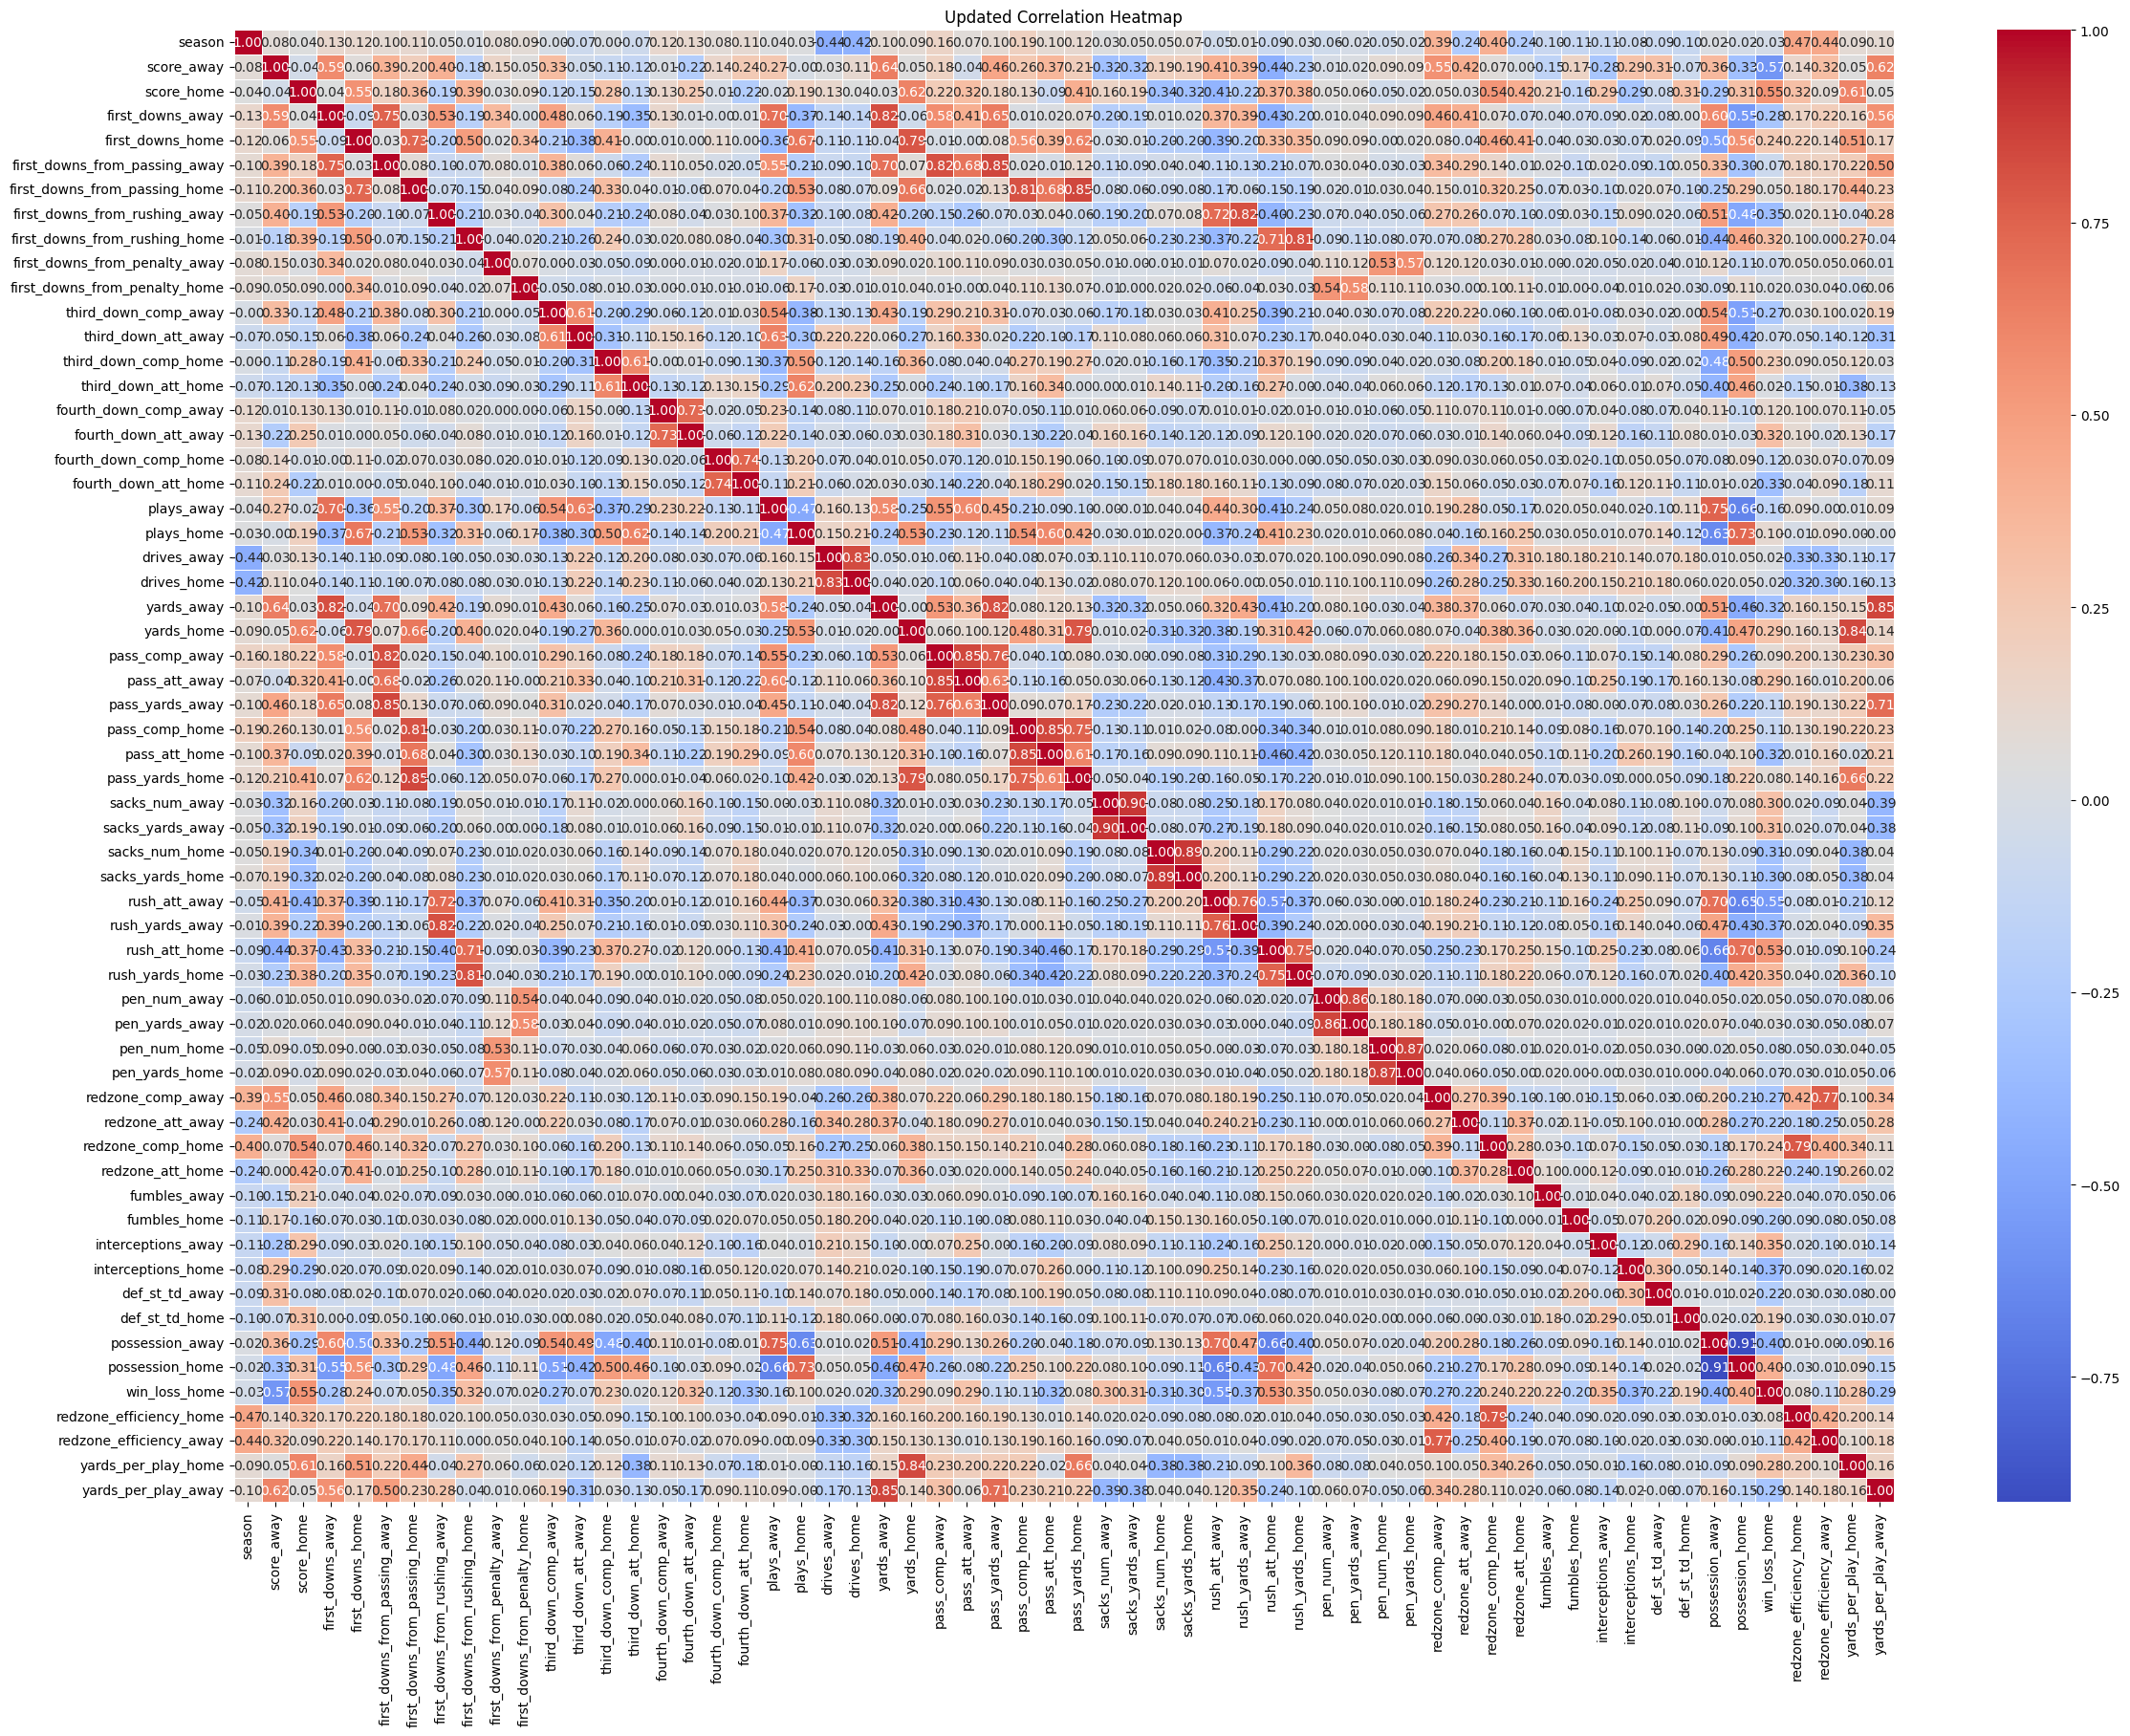

In [52]:
# Updated correlation heatmap
plt.figure(figsize=(28, 20))
updated_numeric_data = data.select_dtypes(include=['number'])
heatmap = sns.heatmap(
    updated_numeric_data.corr(), 
    annot=True, 
    fmt=".2f", 
    annot_kws={"size": 10}, 
    cmap='coolwarm', 
    linewidths=0.5
)
plt.title('Updated Correlation Heatmap')
plt.show()

### Observations: Derived Features
1. Red Zone Efficiency:
   - Teams with higher red zone efficiency are more likely to score consistently, as shown by its moderate-to-strong correlation with score_home.
2. Yards per Play:
   - Yards per play has a strong correlation with total yards and scores, confirming its importance in evaluating offensive strength.


Now, let's group our data visualizations along with results to select features

1. Offensive Metrics

yards_home (Total Offensive Yards for Home Teams):
- Strong correlation with score_home (around 0.6-0.7).
- Indicates the ability of a team to generate yardage through both passing and rushing.

yards_per_play_home (Offensive Efficiency):
- Derived feature combining yards_home and plays_home.
- Measures how effectively a team gains yards per play, which directly impacts scoring potential.

redzone_efficiency_home (Red Zone Conversion Rate):
- Derived feature indicating how often a team scores touchdowns in the red zone.
- A higher efficiency reflects a team’s ability to capitalize on scoring opportunities.

2. Defensive Metrics
interceptions_away (Away Team Turnovers):
- Turnovers by the away team give the home team more opportunities to score.
- Shows a negative impact on away team success, indirectly benefiting home teams.

def_st_td_home (Defensive/Special Teams Touchdowns for Home Teams):
- Indicates points scored by the defense or special teams, often game-changing plays.

3. Time of Possession
possession_home:
- Moderate correlation with score_home (around 0.3-0.4, moderate).
- Teams with longer possession tend to control the game flow, leading to higher chances of winning.

4. Turnovers
fumbles_away and fumbles_home:
- Turnovers are critical moments in any game.
- Fewer turnovers for the home team correlate positively with winning outcomes.

5. Scoring Metrics
score_home (Final Score for Home Teams):
- Although this is directly related to the win/loss outcome, it can also act as a key derived metric to study relationships between predictors like yards, possessions, and scoring.

so with that, here are the features that stand out for modeling win_loss_home:

Offensive Efficiency:
- yards_home
- yards_per_play_home
- redzone_efficiency_home

Defensive Impact:
- interceptions_away
- def_st_td_home

Possession and Turnovers:
- possession_home
- fumbles_home
- fumbles_away

Scoring Metrics:
- score_home (could be excluded if you want to predict without using final scores).

A fair question to ask is: why use home stats for offense and away for defense?

Home Offensive Stats:

- Features like yards_home, yards_per_play_home, and redzone_efficiency_home reflect the performance of the home team's offense, which directly impacts their scoring potential and chances of winning at home.
- **The home team's performance is typically more stable (less variability) due to the advantages of playing in familiar conditions, reduced travel, and crowd support.**

Away Defensive Stats:
- Metrics like interceptions_away and fumbles_away focus on away team mistakes or poor defensive performance that indirectly benefit the home team.
- **Away teams are more prone to turnovers and errors due to travel fatigue, hostile crowds, and unfamiliar environments.**

the columns such as "date", time_et, don't affect our data, so let's drop them

In [53]:
# Drop irrelevant columns
data.drop(columns=['date', 'time_et', 'neutral'], inplace=True)

we took care of a decent amount of EDA, let's save the cleaned dataset with getting rid of unneccesary columns and outliers

In [54]:
# thresholds for high interceptions and high scores
high_interceptions_condition = (data['interceptions_home'] > 3) | (data['interceptions_away'] > 3)
high_scores_condition = (data['score_home'] > 50) | (data['score_away'] > 50)

# combine conditions to filter out high interception and high-scoring games
filtered_data = data[~(high_interceptions_condition | high_scores_condition)]

filtered_data.to_csv('../data/cleaned_nfl_team_stats.csv', index=False)

# Display summary of the filtered dataset
print(f"Original dataset size: {data.shape[0]} rows")
print(f"Cleaned dataset size: {filtered_data.shape[0]} rows")

print("Dataset saved for modeling.")

Dataset saved for modeling.


check balance of win_loss_home

Win/Loss Distribution (Home Teams):
win_loss_home
1    0.564007
0    0.435993
Name: proportion, dtype: float64


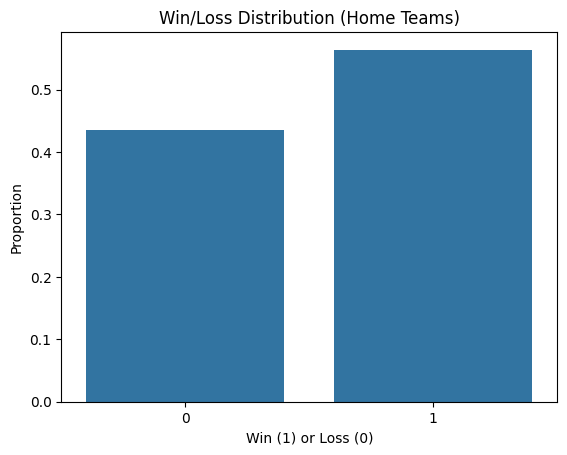

In [55]:
# Check class balance for win/loss
win_loss_distribution = data['win_loss_home'].value_counts(normalize=True)
print("Win/Loss Distribution (Home Teams):")
print(win_loss_distribution)

# Visualize class balance
sns.barplot(x=win_loss_distribution.index, y=win_loss_distribution.values)
plt.title('Win/Loss Distribution (Home Teams)')
plt.xlabel('Win (1) or Loss (0)')
plt.ylabel('Proportion')
plt.show()